# Analyzing titanic Dataset

## Importing libs we'd need in our project

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import datetime 

## Loading titanic csv files and concat them in 1 bid dasaset

In [2]:
train = pd.read_csv('/Users/oleggerasimovich/Downloads/train.csv')
test = pd.read_csv('/Users/oleggerasimovich/Downloads/test.csv')

titanic = pd.concat([train, test], ignore_index=True)

titanic

# Cleaning Dataset

In [1]:
titanic.dropna(subset=['Age', 'Survived'], inplace=True)

titanic.drop(columns=['Ticket', 'Cabin'])

titanic

NameError: name 'titanic' is not defined

# Replace Mr. Algernon Henry Wilson age

In [50]:
titanic.loc[titanic['Name'] == 'Barkworth, Mr. Algernon Henry Wilson']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1.0,1,"Barkworth, Mr. Algernon Henry Wilson",male,48.0,0,0,27042,30.0,A23,S


In [ ]:
birth_day = datetime.datetime(1864, 6, 4)

titanic_date = datetime.datetime(1912, 4, 15)

difference = titanic_date -  birth_day

real_age = difference.days // 360

titanic['Age'] = np.where(titanic["Name"] == 'Barkworth, Mr. Algernon Henry Wilson', real_age, titanic['Age'])

titanic.loc[titanic['Name'] == 'Barkworth, Mr. Algernon Henry Wilson']

# Creating pie diogram between survived and died old peoples in different classes

In [51]:
age = titanic.loc[titanic['Age'] > 45]

old = pd.DataFrame({'Class': age['Pclass'], 'Age': age['Age'], 'Survived': age['Survived']})

old

In [52]:
classified_age = old.groupby(['Class'])['Age'].count()

classified_survived = old.groupby(['Class'])['Survived'].sum()

classified = classified_age.to_frame().join(classified_survived.to_frame())

classified

In [54]:
classified.reset_index(level=0, inplace=True)

classified['Percentage'] = (classified['Survived'] / classified['Age']) * 100

classified.rename(columns={'Age': 'old_count', 
                           'Survived': 'survived_count', 
                           'Class': 'class', 
                           'Percentage': 'percentage'
                          }, inplace=True)

classified['died'] = classified['old_count'] - classified['survived_count']

classified

In [57]:
alive_or_not = pd.DataFrame(np.array([classified['survived_count'].tolist(), classified['died'].tolist()]),
                           index=['Survived', 'Not Survived'],
                           columns=[classified['class']])

alive_or_not

class,1,2,3
Survived,30.0,7.0,1.0
Not Survived,32.0,16.0,17.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff03b1a5ca0>,
      dtype=object)

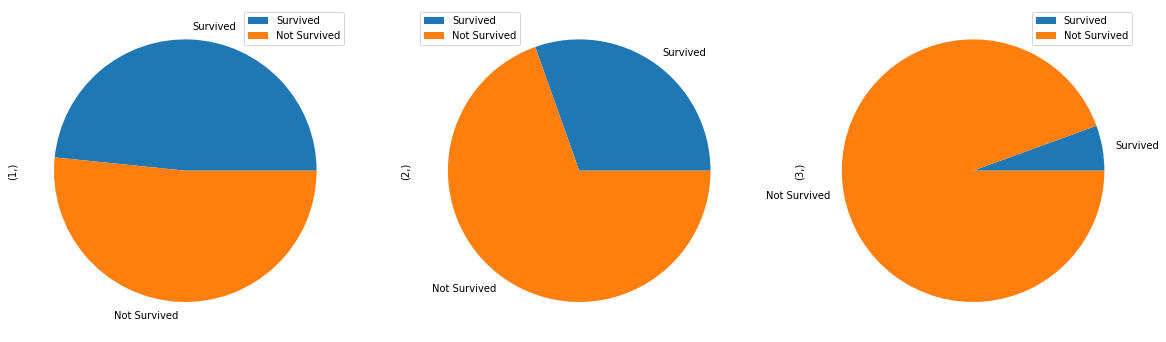

In [58]:
alive_or_not.plot.pie(subplots=True, figsize=(20,10))

# Sex proportions in diffetent classes

In [59]:
sex_and_class = pd.DataFrame({'class': titanic['Pclass'], 
                              'sex': titanic['Sex']})

In [60]:
males = sex_and_class.where(sex_and_class['sex'] == 'male').groupby(['class'])['sex'].count()

females = sex_and_class.where(sex_and_class['sex'] == 'female').groupby(['class'])['sex'].count()


In [61]:
males.name = 'males'

females.name = 'females'

gender_count = males.to_frame().join(females.to_frame())

gender_count.reset_index(level=0, inplace=True)

gender_count

,class,males,females
0,1.0,101,85
1,2.0,99,74
2,3.0,253,102


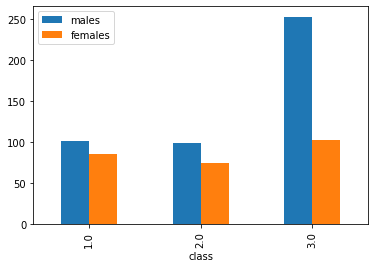

In [62]:
gender_count.plot.bar(x='class')

# Age proportions in different classes

In [63]:
class_and_age = pd.DataFrame({'class': titanic['Pclass'], 'age': titanic['Age']})

ages = class_and_age.groupby(['class'])['age'].mean()

frame = {'mean_age': ages}

age_proportions = pd.DataFrame(frame)

age_proportions.reset_index(level=0, inplace=True)

age_proportions

,class,mean_age
0,1,38.061398
1,2,29.877630
2,3,25.140620


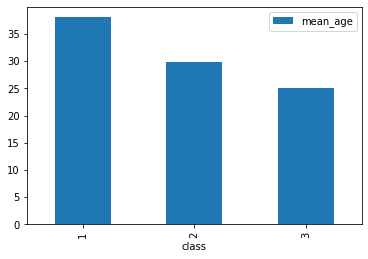

In [64]:
age_proportions.plot.bar(x='class')

# Correlations between sex, class, age, and survival

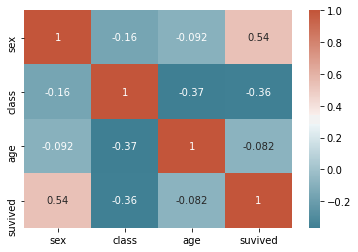

In [65]:
scas = pd.DataFrame({'sex': titanic['Sex'],
                     'class': titanic['Pclass'],
                     'age': titanic['Age'],
                     'suvived': titanic['Survived']})

scas.replace({'male': 0, 'female': 1}, inplace=True)

corr = scas.corr()
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

# Correlations between sex and ticket price

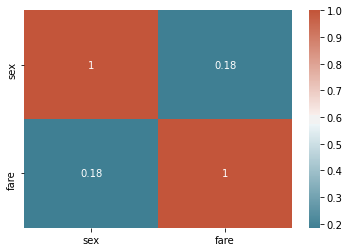

In [66]:
sf = pd.DataFrame({'sex': titanic['Sex'],
                   'fare': titanic['Fare']})

sf.replace({'male': 0, 'female': 1}, inplace=True)

corr = sf.corr()
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

# Maximum age in each class

In [67]:
ca = pd.DataFrame({'class': titanic['Pclass'], 'age': titanic['Age']})

max_age = ca.groupby(['class'])['age'].max()

max_age

class
1    71.0
2    70.0
3    74.0
Name: age, dtype: float64